# Практическая работа №3: Кластерный анализ.
Выполнил студент группы 0373 Курилов Артём. Вариант 11.

## Цель работы
Освоение основных понятий и некоторых методов кластерного анализа,
в частности, метода k-means и метода поиска сгущений.

## Основные теоретические положения
Кластерный анализ - задача разбиения заданной выборки объектов (ситуаций) на подмножества, называемые кластерами, так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров существенно отличались.

Евклидово расстояние: 
$d(x, y) = \sqrt{\sum (x_{i} - y_{i})^{2}}$   

Манхенттенское расстояние: 
$d(x, y) = \sum |x_{i} - y_{i}|$

Формула для нормализования множества точек:  
$X_{норм} = \frac{X - X_{min}}{X_{max} - X_{min}}$  

Метрика - неотрицательная вещественная функция $d(x, y)$, если:  
* $d(x, y) \geq 0$  
* $d(x, y) = d(y, x)$  
* $d(x, y) \leq d(x, z) + d(z, y)$  

Описание алгоритма метода k-means:

1) Случайно выбираются k точек, являющиеся начальными центрами кластеров

2) Относим каждый объект к кластеру с ближайщим центроидом

3) Перестраиваем центроиды

4) Если критерий остановки неудовлетворен, то возвращаемся к пункту 2

Описание алгоритма метода k-medians метод k-means, за тем отличием, что при определении центроида берутся медианы, а не средние значения, а в качестве метрики Манхеттенское расстояние, а не Евклидово.

Описание алгоритма метода силэтов: 
1. Вычисляется коэффициент силуэта с помощью внутрикластерного расстояния и среднего расстояния до ближайшего кластера по каждому кластеру: $S_i = \frac{b_i-a_i}{\max(a_i;b_i)}$, где $a_i = \frac{1}{\#C_j-1}\sum_{x_j \in C_i}d(x_j,x_{C_j})$; $b_i = \min_{j \ne i}\frac{1}{\#C_j}\sum_{x_j \in C_j}d(x_j,x_{C_i})$
2. Находится $S = \frac{1}{k}\sum_{i=1}^k S_i$
3. Строится график зависимости S от k и по пику определяется нужное k

Описание метода сгущений:

1) Случайно выбираем текущий объект из выборки;

2) Помечаем объекты выборки, находящиеся на расстоянии менее, чем R от текущего;

3) Вычисляем их центр тяжести, помечаем этот центр как новый текущий объект;

4) Повторяем шаги 2-3, пока новый текущий объект не совпадет с прежним;

5) Помечаем объекты внутри сферы радиуса R вокруг текущего объекта как кластеризованные, выкидываем их из выборки;

6) Повторяем шаги 1-5, пока не будет кластеризована вся выборка.

## Постановка задачи
Дано конечное множество из объектов, представленных двумя признаками (в качестве этого множества принимаем исходную двумерную выборку, сформированную ранее в практической работе №2). Выполнить разбиение исходного множества объектов на конечное число подмножеств
(кластеров) с использованием метода k-means и метода поиска сгущений. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Используемые бибилиотеки:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable
import random
import statistics

### Выборка

In [ ]:
samplex1 = [63.05, 60.99, 56.54, 57.9, 53.57, 57.45, 57.53, 58.77, 56.34, 59.73, 60.95, 61.03, 64.02,
           64.72, 62.71, 64.67, 64.81, 67.99, 67.60, 68.7, 68.88, 70.83, 69.27, 68.72, 69.6, 70.77,
           72.05, 72.04, 71.9, 72.33, 72.25, 73.4, 72.72, 71.24, 73, 72.4, 73.8, 72.14, 69.78,
           72.15, 75.33, 75.29, 77.19, 76.15, 75.93, 78.51, 78.5, 75.88, 76.32, 76.89, 74.52, 74.12,
           75.84, 75.5, 76.86, 76.28, 78.68, 79.89, 80.58, 82.75, 82.4, 86.66, 82.26, 78.45, 78.76,
           77.98, 75.41, 72.42, 73.83, 74.952, 74.41, 73.45, 75.83, 79.5, 78.76, 79.41, 80.94, 82.12,
           80.34, 79.69, 83.04, 88.57, 88.62, 88.15, 88.41, 89.95, 88.67, 88.7, 88.58, 90.2, 91.24, 
           92.36, 91.62, 91.71, 89.22, 88.57, 88.59, 87.04]
sampley1 = [59.804, 55.857, 52.8, 53.005, 50.677, 54.3, 55.295, 56.907, 54.82, 56.547, 59.408, 59.38,
           62.02, 63.562, 60.486, 63.284, 63.45, 66.267, 65.55, 66.873, 67.764, 68.858, 66.42, 66.95, 
           68.674, 69.673, 70.606, 69.8, 70.9, 71.489, 70.3, 72.161, 70.1, 69.396, 71.569, 71.068, 72.262,
           71, 67.351, 70.491, 73.643, 74.282, 74.827, 74.175, 74.315, 75.18, 77.305, 74.42, 74.883, 74.611,
           73.283, 73.173, 74.082, 73.9, 75.4, 75.398, 77.198, 78.4, 79.104, 81.287, 81.516, 83.316, 77.381,
           76.803, 74.868, 76.592, 73.5, 70.327, 72.94, 73.961, 73.214, 71.8, 74.473, 78.16, 77.25, 76.4,
           78.581, 81.026, 79.139, 76.112, 80.801, 85.301, 87.018, 85.865, 87.28, 88.385, 87.307, 87.093, 86.384,
           88.622, 88.468, 91.133, 90.289, 88.391, 88, 87.497, 86.933, 84.95]

In [ ]:
samplex1 = np.sort(samplex1)
sampley1 = np.sort(sampley1)

### Пункт 1

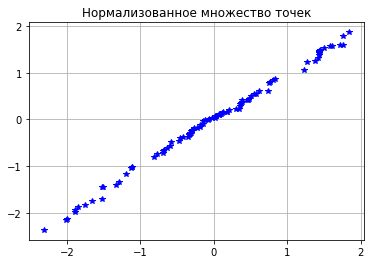

In [ ]:
n = 98
Dx = 0
Dy = 0
samplex = [0] * 98
sampley = [0] * 98
MOx = (sum(samplex1)/n)
MOy = (sum(sampley1)/n)
for i in range(98):
    Dx = Dx + (samplex1[i] - MOx)**2
Dx = Dx/n
skox = math.sqrt(Dx)
for i in range(98):
    Dy = Dy + (sampley1[i] - MOy)**2
Dy = Dy/n
skoy = math.sqrt(Dy)
for i in range(98): 
    samplex[i] = round((samplex1[i] - MOx)/skox, 3) # нормализовали множество через формулу (x-xср)/ско, называется z-нормализация(z-масштабирование) или нормализация средним
for i in range(98): 
    sampley[i] = round((sampley1[i] - MOy)/skoy, 3) 
for i in range(n):
    plt.plot(samplex[i], sampley[i], 'b*')
plt.title("Нормализованное множество точек")
plt.grid()
plt.show()

### Пункт 2

In [ ]:
kmax = round(math.sqrt(n/2))
print("Вверхний предел количества кластеров: ", kmax)

Вверхний предел количества кластеров:  7


### Пункт 3

Центроиды: [[0.0, -0.0]]
Количество элементов в кластерах [98]


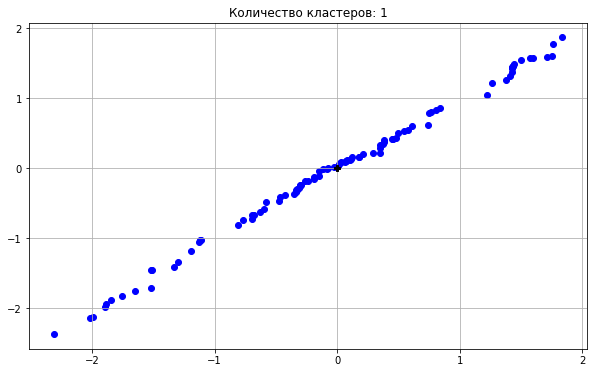

Центроиды: [[-0.65, -0.63], [0.94, 0.91]]
Количество элементов в кластерах [58, 40]


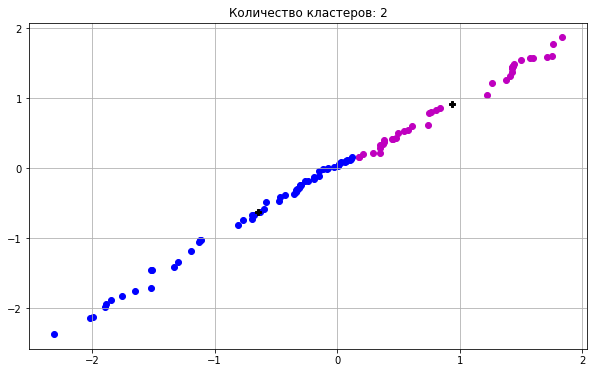

Центроиды: [[-1.55, -1.58], [-0.05, -0.03], [1.34, 1.32]]
Количество элементов в кластерах [18, 57, 23]


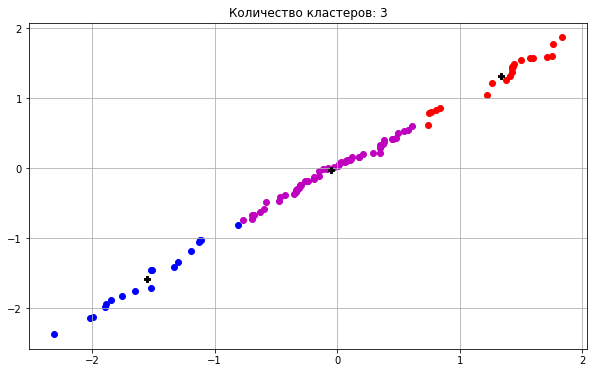

Центроиды: [[-1.59, -1.63], [-0.39, -0.34], [0.33, 0.33], [1.5, 1.47]]
Количество элементов в кластерах [17, 29, 34, 18]


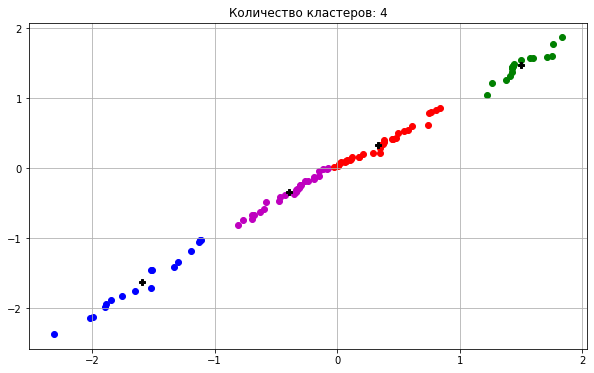

Центроиды: [[-1.59, -1.63], [-0.39, -0.34], [0.33, 0.33], [1.4, 1.37], [1.71, 1.66]]
Количество элементов в кластерах [17, 29, 34, 12, 6]


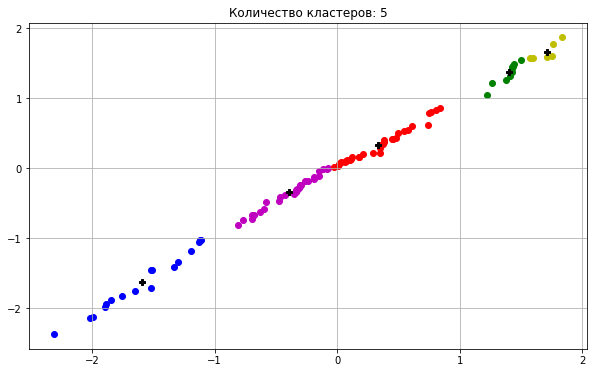

Центроиды: [[-1.59, -1.63], [-0.46, -0.43], [0.01, 0.05], [0.44, 0.4], [0.85, 0.82], [1.52, 1.49]]
Количество элементов в кластерах [17, 22, 22, 14, 6, 17]


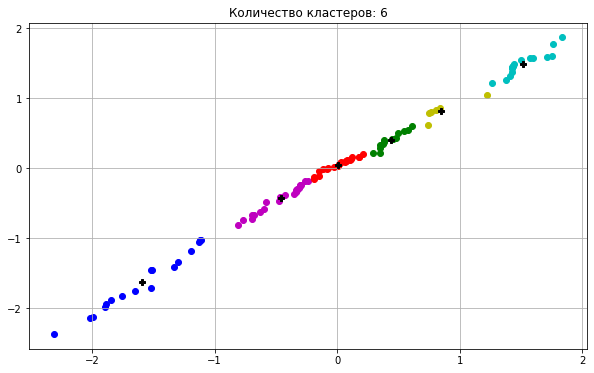

Центроиды: [[-1.73, -1.8], [-0.86, -0.82], [-0.32, -0.27], [0.1, 0.12], [0.58, 0.56], [1.4, 1.37], [1.71, 1.66]]
Количество элементов в кластерах [13, 11, 19, 22, 15, 12, 6]


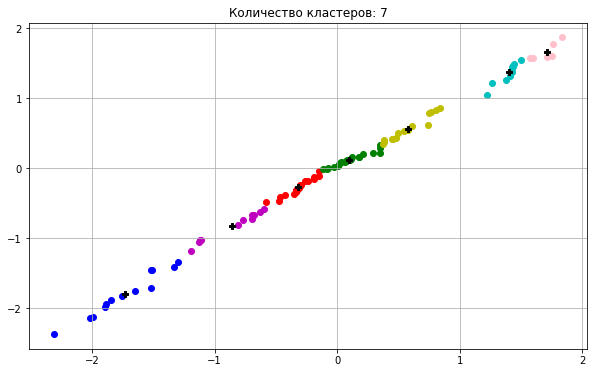

In [ ]:
def Kmeans(x,y,center,n):
    pog=np.inf
    while pog>0.001:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            dist=[0]*n
            for j in range(n):
                dist[j]=((x[i]-center[j][0])**2+(y[i]-center[j][1])**2)
            min=100
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        sum_x=[0]*n
        sum_y=[0]*n
        pog_c=[0]*n
        for i in range(n):
            sum_x[i]=sum(list_x[i])/len(list_x[i])
            sum_y[i]=sum(list_y[i])/len(list_y[i])
        for i in range(n):
            pog_c[i]=(sum_x[i]-center[i][0])**2+(sum_y[i]-center[i][1])**2
        pog=sum(pog_c)
        for i in range(n):
            center[i][0]=round(sum_x[i],2)
            center[i][1]=round(sum_y[i],2)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return center, list_x,list_y,c
def print_gr(center,list_x,list_y,n):
    fig, graf=plt.subplots(figsize=(10, 6))
    color = ['b','m','r','g','y','c','pink']
    for i in range(n):
        graf.scatter(list_x[i],list_y[i],c=color[i])
        graf.plot(center[i][0],center[i][1],'k',marker="P")
    graf.set_title('Количество кластеров: %i'%(i+1))
    plt.grid()
    plt.show()
C = [[[samplex[14], sampley[14]]],
     [[samplex[14], sampley[14]],[samplex[84], sampley[84]]],
     [[samplex[14], sampley[14]],[samplex[61], sampley[61]],[samplex[84], sampley[84]]],
     [[samplex[14], sampley[14]],[samplex[48], sampley[48]],[samplex[70], sampley[70]],[samplex[84], sampley[84]]],
     [[samplex[14], sampley[14]],[samplex[48], sampley[48]],[samplex[70], sampley[70]],[samplex[84], sampley[84]],[samplex[94], sampley[94]]],
     [[samplex[14], sampley[14]],[samplex[41], sampley[41]],[samplex[48], sampley[48]],[samplex[61], sampley[61]],[samplex[81], sampley[81]],[samplex[94], sampley[94]]],
     [[samplex[14], sampley[14]],[samplex[15], sampley[15]],[samplex[48], sampley[48]],[samplex[59], sampley[59]],[samplex[67], sampley[67]],[samplex[81], sampley[81]],[samplex[94], sampley[94]]]]
table = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
for i in range(kmax):
    center,list_x,list_y,ell=Kmeans(samplex,sampley,C[i],i+1)
    print("Центроиды:", center)
    print("Количество элементов в кластерах",ell)
    print_gr(center,list_x,list_y,i+1)
    table.add_row([i+1,center[0],ell[0]])
    for j in range(1,i+1):
        table.add_row(["",center[j], ell[j]])

### Пункт 4

Центроиды: [[0.0175, 0.066]]
Количество элементов в кластерах [98]


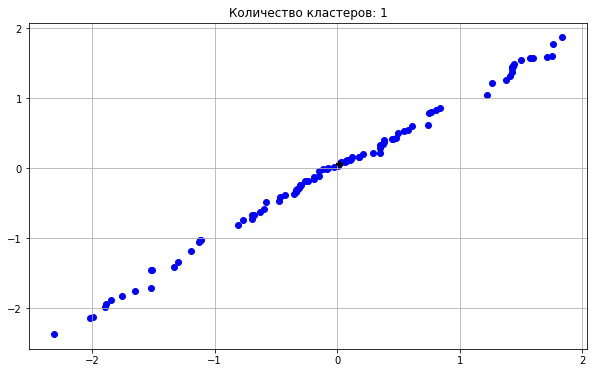

Центроиды: [[-0.281, -0.211], [1.4275, 1.43]]
Количество элементов в кластерах [74, 24]


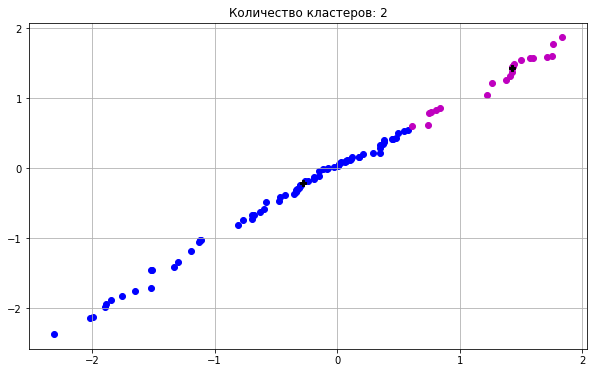

Центроиды: [[-1.52, -1.584], [-0.009, 0.0285], [1.4285, 1.438]]
Количество элементов в кластерах [18, 58, 22]


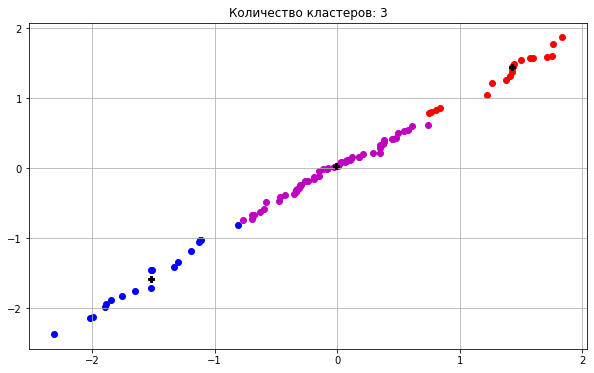

Центроиды: [[-1.522, -1.713], [-0.327, -0.31], [0.349, 0.257], [1.435, 1.4635]]
Количество элементов в кластерах [17, 29, 34, 18]


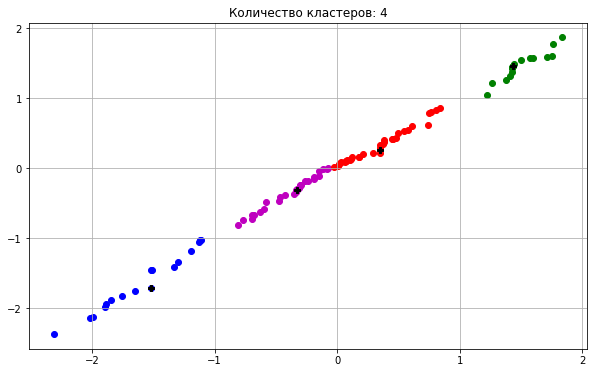

Центроиды: [[-1.522, -1.713], [-0.327, -0.31], [0.349, 0.257], [1.4275, 1.43], [1.7325, 1.594]]
Количество элементов в кластерах [17, 29, 34, 12, 6]


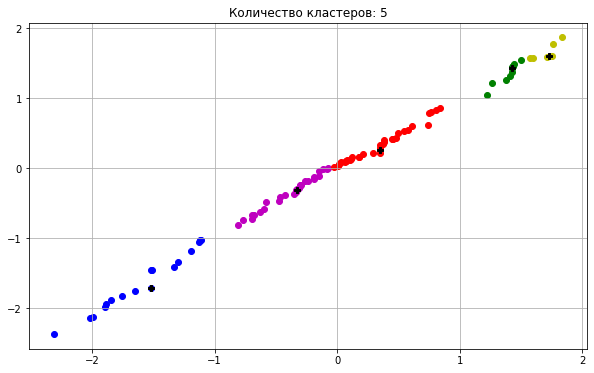

Центроиды: [[-1.522, -1.713], [-0.3455, -0.35], [0.049, 0.087], [0.38, 0.408], [0.7605, 0.796], [1.435, 1.4635]]
Количество элементов в кластерах [17, 24, 20, 13, 6, 18]


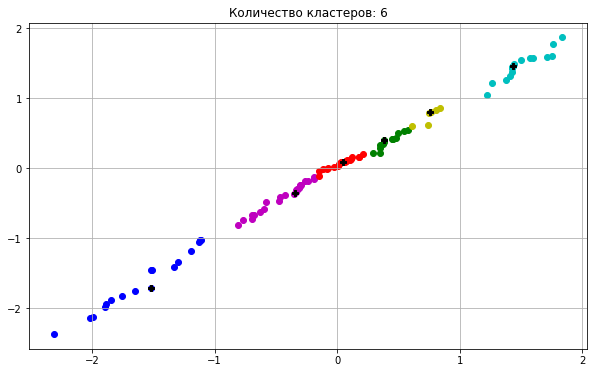

Центроиды: [[-1.755, -1.823], [-0.733, -0.727], [-0.316, -0.281], [0.068, 0.103], [0.5, 0.508], [1.4275, 1.43], [1.7325, 1.594]]
Количество элементов в кластерах [13, 12, 17, 21, 17, 12, 6]


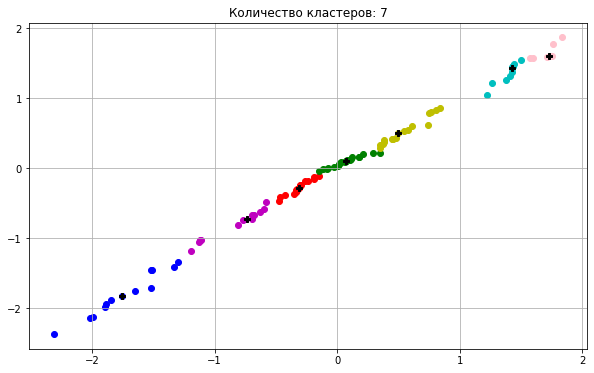

In [ ]:
def Kmedians(x,y,center,n):
    pog=np.inf
    while pog>0.01:    
        list_x=[]
        list_y=[]
        for i in range(n):
            list_x+=[[]]
            list_y+=[[]]
        for i in range(len(x)):
            dist=[0]*n
            for j in range(n):
                dist[j]=(abs(x[i]-center[j][0])+abs(y[i]-center[j][1]))
            min=10000
            for k in range(n):
                if dist[k]<min:
                    min=dist[k]
                    l=k
            list_x[l]+=[x[i]]
            list_y[l]+=[y[i]]
        median_x=[0]*n
        median_y=[0]*n
        pog_c=[0]*n
        for i in range(n):
            median_x[i]=statistics.median(list_x[i])
            median_y[i]=statistics.median(list_y[i])
        for i in range(n):
            pog_c[i]=(abs(median_x[i]-center[i][0])+abs(median_y[i]-center[i][1]))
        pog=sum(pog_c)
        for i in range(n):
            center[i][0]=round(median_x[i],4)
            center[i][1]=round(median_y[i],4)
        c=[]
        for i in range(n):
            c+=[len(list_x[i])]
    return center, list_x,list_y,c
table2 = PrettyTable(["Значение k","Центроиды кластера","Объем кластера"])
for i in range(kmax):
    center,list_x,list_y,ell=Kmedians(samplex,sampley,C[i],i+1)
    print("Центроиды:", center)
    print("Количество элементов в кластерах",ell)
    print_gr(center,list_x,list_y,i+1)
    table2.add_row([i+1,center[0],ell[0]])
    for j in range(1,i+1):
        table2.add_row(["",center[j],ell[j]])

### Пункт 5

In [ ]:
print("Алгоритм k-means:")
print(table)
print("Алгоритм k-medians:")
print(table2)

Алгоритм k-means:
+------------+--------------------+----------------+
| Значение k | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|     1      |  [0.0175, 0.066]   |       98       |
|     2      |  [-0.281, -0.211]  |       58       |
|            |   [1.4275, 1.43]   |       40       |
|     3      |  [-1.52, -1.584]   |       18       |
|            |  [-0.009, 0.0285]  |       57       |
|            |  [1.4285, 1.438]   |       23       |
|     4      |  [-1.522, -1.713]  |       17       |
|            |  [-0.327, -0.31]   |       29       |
|            |   [0.349, 0.257]   |       34       |
|            |  [1.435, 1.4635]   |       18       |
|     5      |  [-1.522, -1.713]  |       17       |
|            |  [-0.327, -0.31]   |       29       |
|            |   [0.349, 0.257]   |       34       |
|            |   [1.4275, 1.43]   |       12       |
|            |  [1.7325, 1.594]   |       6        |
|     6      |  [-1.522, -1.

### Пункт 6


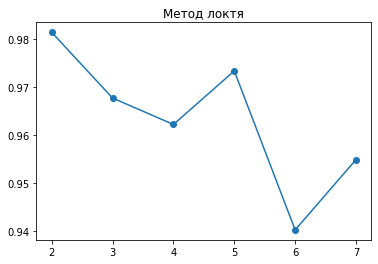

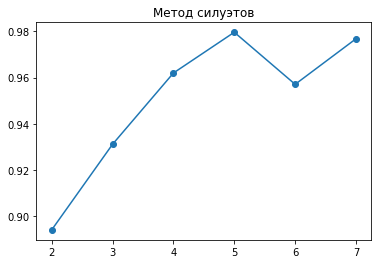

In [ ]:
x,y=[],[]
for i in range(1,kmax):
    x+=[(i+1)]
    center,list_x,list_y,ell = Kmeans(samplex,sampley,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_dist,sum_dist2=0,0
        minim=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_dist2+=((list_x[k][l]-list_x[k][p])**2+(list_y[k][l]-list_y[k][p])**2)
                    sum_dist+=((list_x[k][l]-center[k][0])**2+(list_y[k][l]-center[k][1])**2)
                if sum_dist2<minim:
                    minim=sum_dist2
        sb+=[(minim/k)/ell[k]]
        sa+=[(sum_dist/(k+1))/(ell[j]-1)]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sa[j],sb[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.title("Метод локтя")
plt.show()  
x,y=[],[]
for i in range(1,kmax):
    x+=[(i+1)]
    center,list_x,list_y,ell=Kmedians(samplex,sampley,C[i],i+1)
    s,sb,sa=[],[],[]
    for j in range(i+1):
        sum_dist,sum_dist2=0,0
        minim=1000
        for k in range(i+1):
            if (k!=j):
                for l in range(len(list_x[k])):
                    for p in range(len(list_x[k])):
                        sum_dist2+=(abs(list_x[k][l]-list_x[k][p])+abs(list_y[k][l]-list_y[k][p]))
                    sum_dist+=(abs(list_x[k][l]-center[k][0])+abs(list_y[k][1]-center[k][1]))
                if sum_dist2<minim:
                    minim=sum_dist2
        sa+=[(sum_dist/k)/(ell[j]-1)]
        sb+=[(minim)/ell[k]]
    for j in range(len(sa)):
        s+=[(sb[j]-sa[j])/(max(sb[j],sa[j]))]
    y+=[sum(s)/len(sa)]
plt.plot(x,y,marker='o')
plt.title("Метод силуэтов")
plt.show()  

По графикам видно, что для обоих алгоритмов оптимальное количество кластеров равно 3.

### Пункт 7

Радиус R =  5.92
Количество кластеров: 1
Центроиды: [[-0. -0.]]
Объем кластеров: [98]


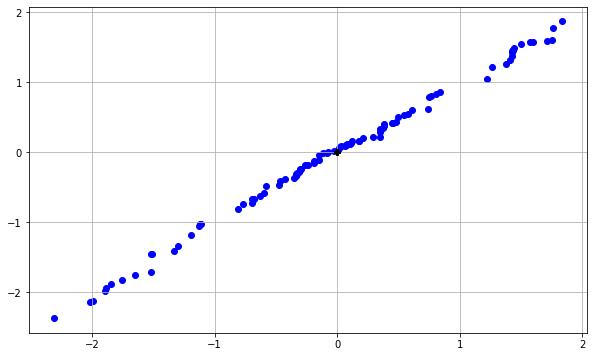

Радиус R =  1.92
Количество кластеров: 3
Центроиды: [[-0.065 -0.05 ]
 [-1.81  -1.875]
 [ 1.534  1.511]]
Объем кластеров: [71, 11, 16]


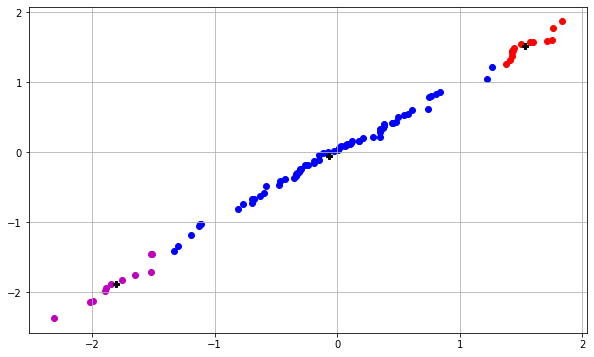

Радиус R =  0.62
Количество кластеров: 6
Центроиды: [[-1.876 -1.968]
 [-1.277 -1.241]
 [-0.047 -0.02 ]
 [-0.682 -0.66 ]
 [ 0.627  0.613]
 [ 1.502  1.469]]
Объем кластеров: [9, 8, 43, 8, 12, 18]


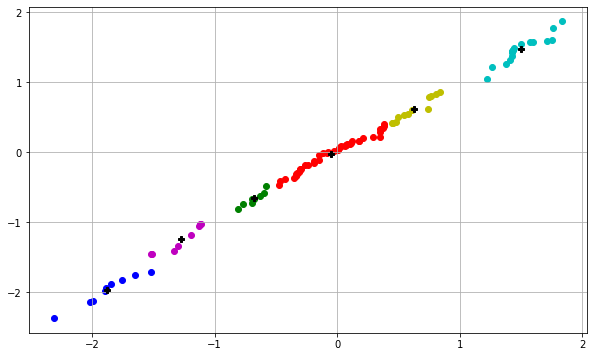

Радиус R =  0.32
Количество кластеров: 12
Центроиды: [[-2.31  -2.365]
 [-1.899 -1.981]
 [-1.473 -1.52 ]
 [-1.137 -1.068]
 [-0.64  -0.615]
 [-0.24  -0.19 ]
 [ 0.178  0.181]
 [ 0.545  0.509]
 [ 0.791  0.822]
 [ 1.462  1.439]
 [ 1.223  1.047]
 [ 1.782  1.748]]
Объем кластеров: [1, 6, 6, 4, 10, 20, 21, 8, 4, 14, 1, 3]


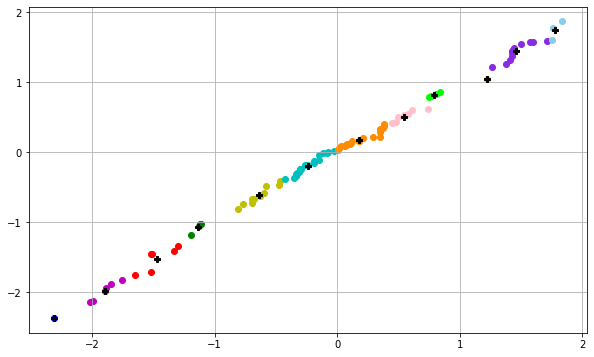

Радиус R =  0.22
Количество кластеров: 17
Центроиды: [[-2.31  -2.365]
 [-1.928 -2.013]
 [-1.643 -1.762]
 [-1.416 -1.414]
 [-1.137 -1.068]
 [-0.697 -0.686]
 [-0.311 -0.27 ]
 [-0.526 -0.474]
 [ 0.053  0.09 ]
 [-0.148 -0.072]
 [ 0.397  0.359]
 [ 0.618  0.576]
 [ 0.791  0.822]
 [ 1.457  1.445]
 [ 1.244  1.132]
 [ 1.742  1.655]
 [ 1.832  1.865]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


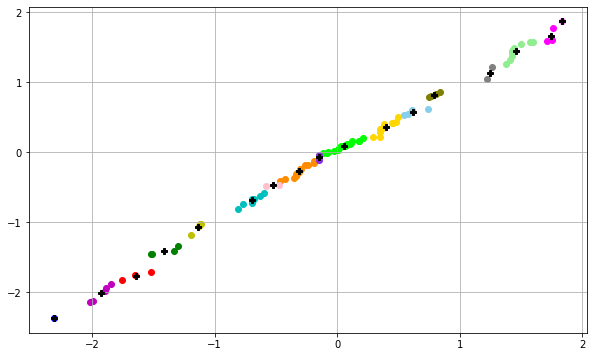

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|    5.92    |    [-0.0, -0.0]    |       98       |
|    1.92    |  [-0.065, -0.05]   |       71       |
|            |  [-1.81, -1.875]   |       11       |
|            |   [1.534, 1.511]   |       16       |
|    0.62    |  [-1.876, -1.968]  |       9        |
|            |  [-1.277, -1.241]  |       8        |
|            |  [-0.047, -0.02]   |       43       |
|            |  [-0.682, -0.66]   |       8        |
|            |   [0.627, 0.613]   |       12       |
|            |   [1.502, 1.469]   |       18       |
|    0.32    |  [-2.31, -2.365]   |       1        |
|            |  [-1.899, -1.981]  |       6        |
|            |  [-1.473, -1.52]   |       6        |
|            |  [-1.137, -1.068]  |       4        |
|            |  [-0.64, -0.615]   |       10       |
|            |   [-0.24, -0.19]   |       20  

In [ ]:
def FOREL(x, y, R):
    center= []
    clust = []
    u=[]
    ell=[]
    for i in range(len(x)):
        u+=[[x[i],y[i]]]
    while (len(u)!=0):
        xc = u[0]
        while True:
            k=[]
            for i in range(len(u)):
                if ((xc[0]-u[i][0])**2 + (xc[1]-u[i][1])**2)**0.5 <= R:
                    k+=[u[i]]
            xc_=[0,0]
            for i in range(len(k)):
                xc_[0]+=k[i][0]/len(k)
                xc_[1]+=k[i][1]/len(k)
            if xc == xc_:
                break
            xc = xc_
        u = [i for i in u if i not in k]
        center+=[xc]
        clust+=[k]
        ell+=[len(k)]
    
    return center,clust,ell
mx=np.zeros((len(samplex),len(samplex)))
Rmin=1000
Rmax=-1
for i in range(len(samplex)):
    for j in range(len(samplex)):
        if i>j:
            mx[j][i]=((samplex[i]-samplex[j])**2 + (sampley[i]-sampley[j])**2)**0.5
mx=mx.tolist()
for i in range(len(samplex)):
    for j in range(len(samplex)):
        if Rmax<mx[i][j]:
            Rmax=mx[i][j]
def gr(center,cl):
    fig, graf=plt.subplots(figsize=(10, 6))
    color= ['b','m','r','g','y','c','darkorange','pink','lime','blueviolet','gold','skyblue','olive','lightgreen','grey','magenta','violet','brown','peru']
    for j in range(len(cl)):
        for k in range(len(cl[j])):
            graf.scatter(cl[j][k][0],cl[j][k][1],c=color[j])
        plt.plot(center[j][0],center[j][1],'k',marker="P")   
    plt.grid()
    plt.show()
R=[Rmax,Rmax-4,Rmax-5.3,Rmax-5.6,Rmax-5.7]
table3 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    center,cl,ell=FOREL(samplex,sampley,R[i]) 
    print("Радиус R = ", round(R[i],3))
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",ell)
    table3.add_row([round(R[i],3),center[0],ell[0]])
    for j in range(1,len(cl)):
        table3.add_row(["",center[j],ell[j]])
    gr(center,cl)
print(table3)

### Пункт 8

Количество кластеров: 1
Центроиды: [[-0. -0.]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


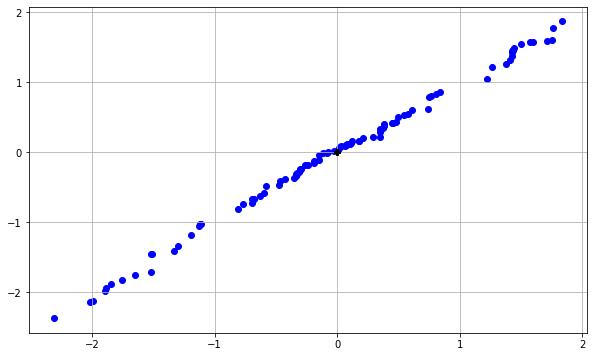

Количество кластеров: 3
Центроиды: [[-0.065 -0.05 ]
 [-1.81  -1.875]
 [ 1.534  1.511]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


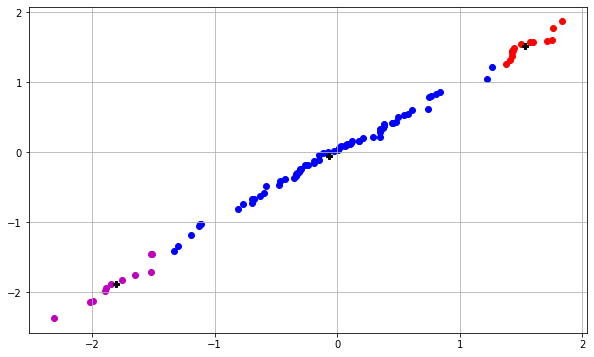

Количество кластеров: 6
Центроиды: [[-1.876 -1.968]
 [-1.277 -1.241]
 [-0.047 -0.02 ]
 [-0.682 -0.66 ]
 [ 0.627  0.613]
 [ 1.502  1.469]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


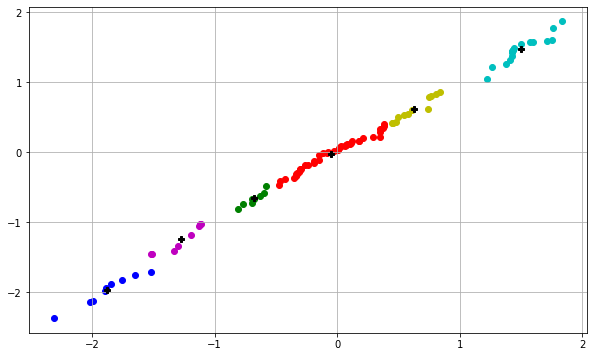

Количество кластеров: 12
Центроиды: [[-2.31  -2.365]
 [-1.899 -1.981]
 [-1.473 -1.52 ]
 [-1.137 -1.068]
 [-0.62  -0.594]
 [-0.231 -0.18 ]
 [ 0.178  0.181]
 [ 0.545  0.509]
 [ 0.791  0.822]
 [ 1.462  1.439]
 [ 1.223  1.047]
 [ 1.782  1.748]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


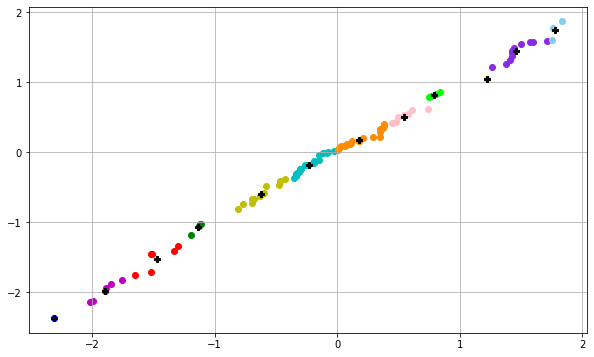

Количество кластеров: 17
Центроиды: [[-2.31  -2.365]
 [-1.928 -2.013]
 [-1.643 -1.762]
 [-1.416 -1.414]
 [-1.137 -1.068]
 [-0.697 -0.686]
 [-0.311 -0.27 ]
 [-0.526 -0.474]
 [ 0.053  0.09 ]
 [-0.148 -0.072]
 [ 0.397  0.359]
 [ 0.618  0.576]
 [ 0.791  0.822]
 [ 1.457  1.445]
 [ 1.244  1.132]
 [ 1.742  1.655]
 [ 1.832  1.865]]
Объем кластеров: [1, 5, 3, 4, 4, 7, 15, 2, 18, 2, 11, 4, 4, 12, 2, 3, 1]


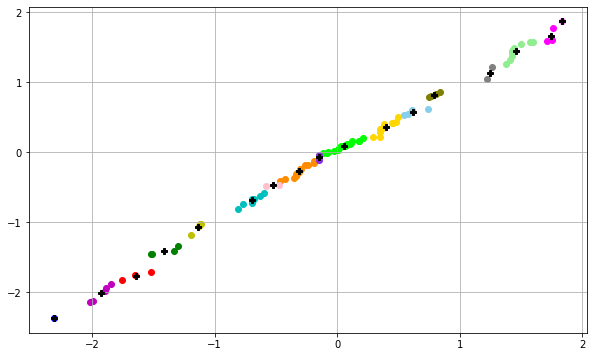

+------------+--------------------+----------------+
| Значение R | Центроиды кластера | Объем кластера |
+------------+--------------------+----------------+
|   5.921    |    [-0.0, -0.0]    |       1        |
|   1.921    |  [-0.065, -0.05]   |       1        |
|            |  [-1.81, -1.875]   |       5        |
|            |   [1.534, 1.511]   |       3        |
|   0.621    |  [-1.876, -1.968]  |       1        |
|            |  [-1.277, -1.241]  |       5        |
|            |  [-0.047, -0.02]   |       3        |
|            |  [-0.682, -0.66]   |       4        |
|            |   [0.627, 0.613]   |       4        |
|            |   [1.502, 1.469]   |       7        |
|   0.321    |  [-2.31, -2.365]   |       1        |
|            |  [-1.899, -1.981]  |       5        |
|            |  [-1.473, -1.52]   |       3        |
|            |  [-1.137, -1.068]  |       4        |
|            |  [-0.62, -0.594]   |       4        |
|            |  [-0.231, -0.18]   |       7   

In [ ]:
table4 = PrettyTable(["Значение R","Центроиды кластера","Объем кластера"])
for i in range(len(R)):
    R[i]=R[i]+0.001
    center,cl,kol_el=FOREL(samplex,sampley,R[i]) 
    print("Количество кластеров:",len(cl))
    for k in range(len(cl)):
        for j in range(len(center[k])):
            center[k][j]=round(center[k][j],3)   
    print("Центроиды:", np.array(center))
    print("Объем кластеров:",ell)
    table4.add_row([round(R[i],3),center[0],ell[0]])
    for j in range(1,len(cl)):
        table4.add_row(["",center[j],ell[j]])
    gr(center,cl)
print(table4)

При сравнении таблиц отличий нет или они незначительны, следовательно, метод нечувствителен к погрешностям.

### Пункт 9

По методу силуэтов, было выявлено, что для данной выборки оптимальное количество кластеров для алгоритмов k-means и k-medians равно 3. Разница, между полученными кластерами, незначительная.

При сравнении метода сгущений и методов k-means и k-medians, можно сделать вывод, что R = 0.62 самое оптимальное значение для кластеризации, но это значение можно заметить только перебором радиусов, в общем виде оптимально пользоваться методом k-means или k-medians.

## Выводы
В процессе выполнения данной практической работы были достигнуты поставленные задачи. В первую очередь, освоены основные понятия и некоторые методы кластерного анализа, в частности, метод k-means, k-medians и метод поиска сгущений. Определена «грубая» верхняя оценка количества кластеров k = 7 для представленной выборки. Реализован метод силуэтов для k-means и k-medians, с помощью которому выявлено, что оптимальным количеством кластеров = 3.